In [32]:
import openeo
session = openeo.connect("openeo.vito.be")

In [33]:
session.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.vito.be/openeo/1.0/' with BearerAuth>

In [53]:
sentinel2_data_cube = session.load_collection(
    "TERRASCOPE_S2_TOC_V2",
    temporal_extent=["2021-04-05", "2021-04-05"],
    bands=["B02", "B04", "B08"]
)

In [54]:
sentinel2_data_cube = sentinel2_data_cube.filter_bbox(
    west=-25.82228669683642,
    south=37.79555483451672,
    east=-25.70044923984886,
    north=37.88502062345468,
    
    crs="EPSG:4326"
)

In [55]:
B02 = sentinel2_data_cube.band('B02')
B04 = sentinel2_data_cube.band('B04')
B08 = sentinel2_data_cube.band('B08')

In [56]:
sentinel2_data_cube.download("test.tiff")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


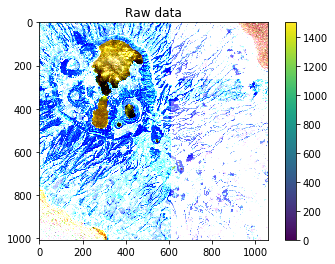

In [84]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt

with rasterio.open('test.tiff', 'r') as ds:
    img = ds.read()  

plt.title("Raw data")
plt.imshow(np.dstack(img), vmin=0, vmax=1500)  
plt.colorbar()
plt.show()

In [60]:
evi_cube = (2.5 * (B08 - B04)) / ((B08 + 6.0 * B04 - 7.5 * B02) + 1.0)
evi_cube.download("bandmath_example.tiff", format="GTIFF")


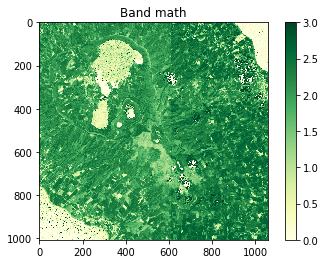

In [67]:
import rasterio
from matplotlib import pyplot as plt

with rasterio.open('bandmath_example.tiff', 'r') as ds:
    img = ds.read()  

plt.title("Band math")
plt.imshow(img[0], vmin=0, vmax=3, cmap='YlGn')  
plt.colorbar()
plt.show()